# Evaluation

In this notebook we will demonstrate how to evaluate a set of generated mixes via objective metrics.

We will use the mixes generated from the [inference notebook](https://github.com/csteinmetz1/automix-toolkit/blob/main/notebooks/inference.ipynb), and we will objectively compare those mixes to the human-made groudn truth mixes.

The objective evaluation of mixes can be carried out through audio features that relate to the most common audio effects used during mixing. Since audio effects generally manipulate audio characteristics such as frequency content, dynamics, spatialization, timbre, or pitch, we can use audio features that are associated with these audio characteristics as a way to numerically evaluate mixes.

We can use the following audio features:
    
-**Spectral features** for EQ and reverberation: centroid, bandwidth, contrast, flatness, and roll-off

-**Spatialisation features** for panning: the Panning Root Mean Square (RMS)

-**Dynamic features** for dynamic range processors: RMS level, dynamic spread and crest factor

-**Loudness features**: the integrated loudness level (LUFS) and peak loudness

Note: This notebook assumes that you have already installed the `automix` package. 

In [94]:
import os
import glob
import torchaudio
import numpy as np

import IPython
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline
%load_ext autoreload
%autoreload 2

from automix.evaluation.utils_evaluation import get_features

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Drums mixing evaluation

We will evaluate two different trained models with a test sample from the ENST-drums subset.

Models: the Differentiable Mixing Console (DMC), and the MixWaveUNet.

In [47]:
# Set the path for the mixes to be evaluated 

mix_target_path = "drums-test-rock/mix/dry_mix_066_phrase_rock_complex_fast_sticks.wav"
mix_auto_path_wun = "drums-test-rock/mix/dry_mix_066_phrase_rock_complex_fast_sticks_MixWaveUNet.wav"
mix_auto_path_dmc = "drums-test-rock/mix/dry_mix_066_phrase_rock_complex_fast_sticks_DMC.wav"

mix_target_path = os.path.join(os.path.realpath('..'), mix_target_path)
mix_auto_path_wun = os.path.join(os.path.realpath('..'), mix_auto_path_wun)
mix_auto_path_dmc = os.path.join(os.path.realpath('..'), mix_auto_path_dmc)


# Global Settings
SR = 44100
max_samples = 30*SR
start_sample = 0 * SR
end_sample = start_sample + max_samples

## Load the MixWaveUNet mix

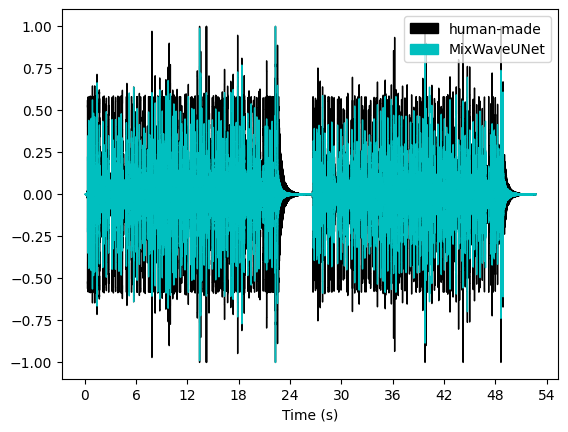

In [141]:
fig, ax = plt.subplots(1, 1)

target_audio, sr = torchaudio.load(mix_target_path)
target_audio = target_audio[:, start_sample: end_sample]
target_audio_to_plot = target_audio.view(1,-1).numpy()
librosa.display.waveshow(target_audio_to_plot, x_axis='s', sr=SR, zorder=3, label='human-made', color='k')
target_audio = target_audio.numpy()

wun_audio, sr = torchaudio.load(mix_auto_path_wun)
wun_audio = wun_audio[:, start_sample: end_sample]
librosa.display.waveshow(wun_audio.view(1,-1).numpy(), x_axis='s', sr=SR, zorder=3, label='MixWaveUNet', color='c')
wun_audio = wun_audio.numpy()

ax.legend()

## Load the DMC mix

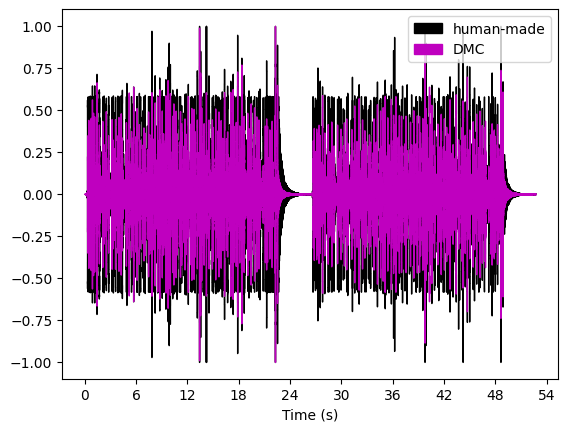

In [144]:
fig, ax = plt.subplots(1, 1)

librosa.display.waveshow(target_audio_to_plot, x_axis='s', sr=SR, zorder=3, label='human-made', color='k')

dmc_audio, sr = torchaudio.load(mix_auto_path_dmc)
dmc_audio = dmc_audio[:, start_sample: end_sample]
librosa.display.waveshow(dmc_audio.view(1,-1).numpy(), x_axis='s', sr=SR, zorder=3, label='DMC', color='m')
dmc_audio = dmc_audio.numpy()

ax.legend()

## Compute the loudness, spectral, panning and dynamic features

In [123]:
wun_features = get_features(target_audio, wun_audio)
dmc_features = get_features(target_audio, dmc_audio)

In [124]:
for k, i in wun_features.items():
    print(k, i)   

lufs_loudness 0.29115022366467924
peak_loudness 0.6851044518032702
mean_mape_loudness 0.4881273377339747
centroid 0.13849602074134498
bandwidth 0.04524536513071262
contrast_lows 0.06622791125690958
contrast_mids 0.026436019544366425
contrast_highs 0.03876288052205605
rolloff 0.09863185067111252
flatness 0.32517245
mean_mape_spectral 0.10556750028360441
panning_rms_total 0.34051264537864906
panning_rms_lows 0.08546223048345863
panning_rms_mids 0.2505879155768408
panning_rms_highs 0.35512257926715274
mean_mape_panning 0.25792134267652533
rms_level 0.22181368011457972
dynamic_spread 0.05263542561305849
crest_factor 0.23489185149042033
mean_mape_dynamic 0.16978031907268618


In [125]:
for k, i in dmc_features.items():
    print(k, i)

lufs_loudness 0.29115022366467924
peak_loudness 0.6851044518032702
mean_mape_loudness 0.4881273377339747
centroid 0.13849602074134498
bandwidth 0.04524536513071262
contrast_lows 0.06622791125690958
contrast_mids 0.026436019544366425
contrast_highs 0.03876288052205605
rolloff 0.09863185067111252
flatness 0.32517245
mean_mape_spectral 0.10556750028360441
panning_rms_total 0.34051264537864906
panning_rms_lows 0.08546223048345863
panning_rms_mids 0.2505879155768408
panning_rms_highs 0.35512257926715274
mean_mape_panning 0.25792134267652533
rms_level 0.22181368011457972
dynamic_spread 0.05263542561305849
crest_factor 0.23489185149042033
mean_mape_dynamic 0.16978031907268618


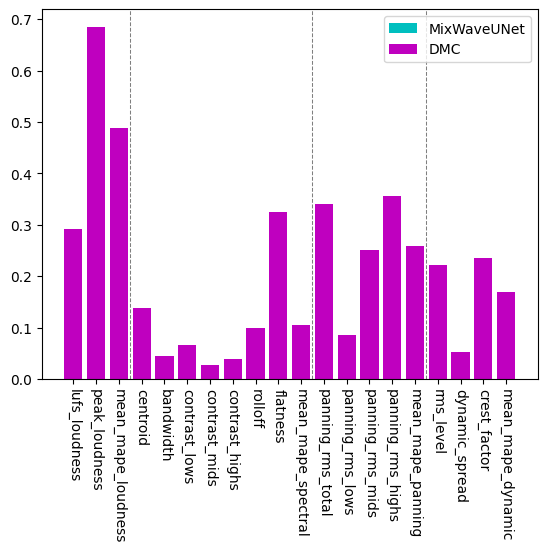

In [148]:
plt.bar(*zip(*wun_features.items()), color='c', label='MixWaveUNet')
plt.bar(*zip(*dmc_features.items()), color='m', label='DMC')
plt.axvline(2.5, 0, 1, linestyle='--', alpha=0.5, color='k', linewidth=0.75)
plt.axvline(10.5, 0, 1, linestyle='--', alpha=0.5, color='k', linewidth=0.75)
plt.axvline(15.5, 0, 1, linestyle='--', alpha=0.5, color='k', linewidth=0.75)
plt.xticks(rotation=-90)
plt.legend()
plt.show()